In [4]:
import numpy as np # linear algebra
import pandas as pd 
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [7]:
import pandas as pd
train_balanced_sarcasm = pd.read_csv("train-balanced-sarcasm.csv")
train_balanced_sarcasm.head(5)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [8]:
df1 = train_balanced_sarcasm[['label', 'comment']].dropna()
df1

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.
...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...
1010822,1,"whatever you do, don't vote green!"
1010823,1,Perhaps this is an atheist conspiracy to make ...
1010824,1,The Slavs got their own country - it is called...


In [9]:
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = int(round(df1['label'].count(), -1) * 0.8)
print(training_size)

808616


In [10]:
koment = df1['comment']
labels = df1['label']
train_data = koment[0:training_size]
train_label = labels[0:training_size]
test_data = koment[training_size:]
test_label = labels[training_size:]

In [11]:
vocab_size = 8000
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

word_index = tokenizer.word_index


train_seq = tokenizer.texts_to_sequences(train_data)
train_pad = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(test_data)
test_pad = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
print (vocab_size)

8000


In [15]:
print(word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
train_seq = np.array(train_seq)
train_pad = np.array(train_pad)
test_seq = np.array(test_seq)
test_pad = np.array(test_pad)

<ipython-input-16-5760831f1844>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_seq = np.array(train_seq)
<ipython-input-16-5760831f1844>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_seq = np.array(test_seq)


In [17]:
model = Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              41472     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 169,601
Trainable params: 169,601
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 5
batch_size = 32

history = model.fit(train_pad, train_label, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

Epoch 1/5
22743/22743 [==============================] - 1113s 49ms/step - loss: 0.5712 - accuracy: 0.7015 - val_loss: 0.5539 - val_accuracy: 0.7103
Epoch 2/5
22743/22743 [==============================] - 1262s 55ms/step - loss: 0.5447 - accuracy: 0.7227 - val_loss: 0.5435 - val_accuracy: 0.7202
Epoch 3/5
22743/22743 [==============================] - 1195s 53ms/step - loss: 0.5317 - accuracy: 0.7320 - val_loss: 0.5412 - val_accuracy: 0.7232
Epoch 4/5
22743/22743 [==============================] - 1007s 44ms/step - loss: 0.5220 - accuracy: 0.7387 - val_loss: 0.5401 - val_accuracy: 0.7235
Epoch 5/5
22743/22743 [==============================] - 1171s 52ms/step - loss: 0.5142 - accuracy: 0.7441 - val_loss: 0.5413 - val_accuracy: 0.7246


In [20]:
accr = model.evaluate(test_pad,test_label)

6318/6318 [==============================] - 101s 16ms/step - loss: 0.5348 - accuracy: 0.7289


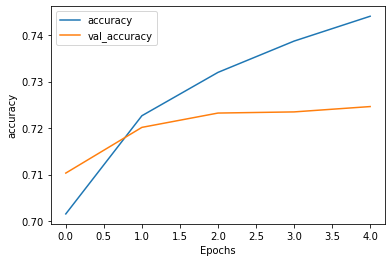

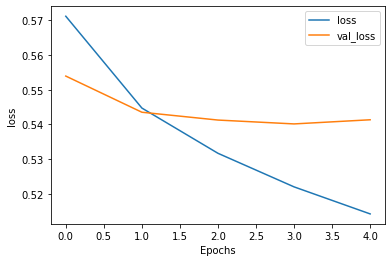

In [21]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")